In [ ]:
import numpy as np
import pandas as pd

def k_means_clustering(data, k, max_iterations=100):
    # Memilih acak k titik sebagai centroids awal
    centroids = data[np.random.randint(0, data.shape[0], k), :]

    for i in range(max_iterations):
        # Menghitung jarak data ke setiap centroid
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])

        # Memasukkan data ke cluster dengan jarak terdekat
        clusters = np.argmin(distances, axis=0)

        # Menghitung centroid baru dari rata-rata setiap cluster
        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])

        # Jika centroid tidak berubah, loop selesai
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Contoh penggunaan
df = pd.read_csv("datasetlks.csv")
data = df.values
clusters, centroids = k_means_clustering(data, k=3)


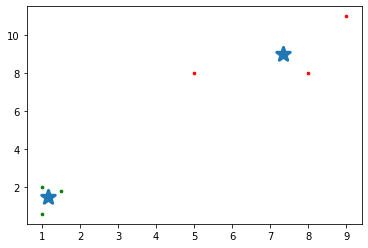

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def initialize_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i] = X[idx[i]]
    return centroids

def k_means(X, k, max_iterations=100):
    m, n = X.shape
    centroids = initialize_centroids(X, k)
    previous_centroids = np.zeros((k, n))
    belongs_to = np.zeros((m,))

    for iteration in range(max_iterations):
        for i in range(m):
            min_distance = 100000
            for j in range(k):
                distance = euclidean_distance(X[i], centroids[j])
                if distance < min_distance:
                    min_distance = distance
                    belongs_to[i] = j

        previous_centroids = np.copy(centroids)

        for i in range(k):
            points = [X[j] for j in range(len(X)) if belongs_to[j] == i]
            centroids[i] = np.mean(points, axis=0)

        if np.array_equal(centroids, previous_centroids):
            break
    return centroids, belongs_to

def plot_clusters(X, belongs_to, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()

    for i in range(len(centroids)):
        points = np.array([X[j] for j in range(len(X)) if belongs_to[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, linewidths=3)

    plt.show()

if __name__ == '__main__':
    X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
    centroids, belongs_to = k_means(X, 2)
    plot_clusters(X, belongs_to, centroids)


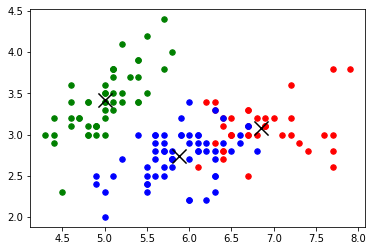

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load iris dataset
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
# iris = pd.read_csv("datasetlks.csv")

# Extract features from the dataset
features = iris.iloc[:, :-1].values

# Use Numpy's kmeans function
from numpy.linalg import norm

def kmeans(X, K, max_iters = 100):
    N, D = X.shape

    # randomly select initial centroids
    idx = np.random.choice(N, K, replace=False)
    centroids = X[idx]

    for i in range(max_iters):
        # Compute distances between each data point and the centroids
        distances = np.array([norm(X - centroid, axis=1) for centroid in centroids])

        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=0)

        # Compute the new centroids based on the mean of the assigned data points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # Check if the centroids have moved
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

K = 3
centroids, labels = kmeans(features, K)

# Plot the results
colors = ['red', 'green', 'blue']
for k in range(K):
    mask = labels == k
    plt.scatter(features[mask, 0], features[mask, 1], c=colors[k], s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', zorder=10)
plt.show()


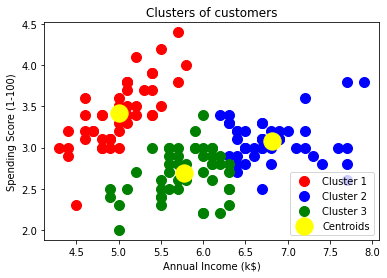

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("iris.csv")

# Extract features
X = df.iloc[:, [0, 1]].values

# Fit KMeans to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the result
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
